# Principal Component Analysis  
https://blog.resolvingpython.com/python-tutorial-or-principal-component-analysis-made-simple

1) Load the data


        Simply execute the following lines of code to load the data
        This dataset contains statistics about Car Accidents (columns)
        In each one of USA States (rows)



In [8]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(5)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
NM,18.4,3.496,4.968,12.328,18.032,869.85,120.75
IL,12.8,4.608,4.352,12.032,12.288,803.11,139.15
KS,17.8,4.806,4.272,13.706,15.130,780.45,133.80
VA,12.7,2.413,3.429,11.049,11.176,768.95,153.72
MA,8.2,1.886,2.870,7.134,6.560,1011.14,135.63


Scale the Data

Why do we need to scale the data?

    Well, it is not the same to increase 1kg of weight than 1m of height
    To make variables comparable we need to scale them into the same range of values
    While maintaining their original distributions, of course


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
dfnorm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
dfnorm.sample(5)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
ND,1.987020,0.249668,3.008718,2.259537,1.756935,-1.122737,-1.007397
TN,0.908956,-0.452080,0.448699,0.541336,0.480236,-0.674340,0.857089
WV,1.962518,1.548553,1.038035,2.130745,1.797712,0.598463,0.734687
CO,-0.536630,0.016920,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
MA,-1.859708,-1.557759,-1.177962,-1.442289,-1.997242,0.703425,0.046230


KMeans() Cluster Analysis

What's the goal of the Cluster Analysis?

    You may observe that there isn't a column that tells you the group a USA State belongs
    Let's say you're USA President and you'd like to group the States regarding their characteristics (columns) of Car Accidents
    Because you won't implement 51 policies (it takes a lot of research and money) for each state
    On the other hand, you would like to apply the same policies to States that behave the same way
    And that's what KMeans() will do for you 

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(dfnorm)


KMeans(n_clusters=3)

Cluster Visualization

How do you visualize the KMeans() model?

    You may colour the points as the group they belong to ↓


In [11]:
import plotly.express as px

px.scatter(x='alcohol', y='ins_premium', data_frame=df, color=model.labels_.astype(str))


Why are the points mixed between the groups?

    We fitted the KMeans() model with 7 columns
    But we are representing just 2 columns

Then, why not represent 7 columns instead of 2?

    Well, the plot will get very abstract to extract meaningful information
    Your head will explode because you won't understand anything if you represent 7 axes (7 dimensions)

Then, what's the solution? ↓

Principal Component Analysis PCA()

    We cannot plot 7 columns
    But we could transform, for example, 5 columns into 1 new column (a Principal Component)

How is that even possible?

    Well, let's take a look at how much in common the original variables have
    By observing the correlation between them ↓


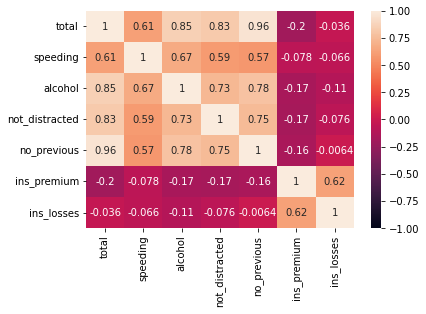

In [12]:
sns.heatmap(dfnorm.corr(), annot=True, vmin=-1);


Aren't lots of variables significantly correlated to each other?

    Yes, total, speeding, alcohol, not_distracted & no_previous have a minimum correlation of 0.57
    Then, it makes sense to gather all the shared information into just 1 variable (a Principal Component)


In [13]:
from sklearn.decomposition import PCA

pca = PCA()
dfpca = pd.DataFrame(pca.fit_transform(dfnorm), index=df.index)

pca_columns = ['PC' + str(i+1) for i in range(pca.n_components_)]
dfpca.columns = pca_columns

dfpca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
AZ,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
AR,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
CA,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958


Ok, I get it, but which original variables are influencing PC1?

    Let's get the weights of the mathematical formula to transform original variables into Components
    They are called loading vectors ↓


In [14]:
weights = pd.DataFrame(pca.components_.T, columns=dfpca.columns, index=dfnorm.columns)
weights.style.applymap(lambda v: f'background-color: darkred; opacity: {int(v*100)+40}%;')\
        .applymap(lambda v: f'color: white')


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total,0.479471,0.068938,-0.269088,0.038956,0.145977,-0.169705,0.800825
speeding,0.375347,0.076585,0.818269,-0.363749,-0.022828,-0.224792,0.017848
alcohol,0.454376,0.033458,0.082933,0.148344,0.354798,0.783768,-0.152858
not_distracted,0.438033,0.042375,-0.126168,0.171266,-0.856469,0.085105,-0.142478
no_previous,0.457034,0.096129,-0.317988,0.039481,0.336110,-0.504012,-0.558754
ins_premium,-0.130832,0.685227,0.256142,0.656396,0.042145,-0.115773,0.041266
ins_losses,-0.069960,0.712524,-0.261735,-0.618399,-0.063272,0.178052,-0.028050


How can someone interpret this table?

    Well, focus on the column PC1
    Every number is the weight for the corresponding original variable
    To transform original data into the value for PC1

Is there some example?

    Yes, look at the value for AL in PC1: 1.6036...

How do you get there?

    You take the weights for PC1 ↓


In [15]:
weights.PC1


total             0.479471
speeding          0.375347
alcohol           0.454376
not_distracted    0.438033
no_previous       0.457034
ins_premium      -0.130832
ins_losses       -0.069960
Name: PC1, dtype: float64


    And the values for AL for the original data ↓


In [16]:
dfnorm.loc['AL', :]


total             0.737446
speeding          1.168148
alcohol           0.439938
not_distracted    1.002301
no_previous       0.277692
ins_premium      -0.580083
ins_losses        0.430514
Name: AL, dtype: float64


    You multiply the corresponding values and compute the sum of all ↓


In [17]:
(weights.PC1 * dfnorm.loc['AL',:]).sum()


1.6036712920638665

Understood, so that's the transformed value you get on PC1 for AL ↓

In [18]:
dfpca.head().style.applymap(lambda x: f'background-color: darkred; color: white' if round(x,2)==1.60 else False)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
AZ,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
AR,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
CA,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958


Cluster Visualization with PCA()

In [19]:
px.scatter(x='PC1', y='PC2', data_frame=dfpca,
           color=model.labels_.astype(str), hover_name=dfpca.index)


Wow, now the groups seem to be separated from each other.

How further can you go on interpreting this plot?

    Take two opposite points in the plot in one axis, X for example

    You have Washington DC and South Carolina SC

    Let's observe the original data for these two values ↓


In [20]:
df.loc[['DC', 'SC'],:]


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05
SC,23.9,9.082,9.799,22.944,19.359,858.97,116.29



    You may observe that the values are very distant
    for the original variables that influence the most PC1
    total, speeding, alcohol, not_distracted, no_previous

What are the maximum and minimum values for these variables?

In [21]:
df.agg(['min', 'max'])


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
min,5.9,1.792,1.593,1.760,5.90,641.96,82.75
max,23.9,9.450,10.038,23.661,21.28,1301.52,194.78



    You may observe that they are practically the same values than those for DC & SC
    Also, their values for ins_losses doesn't differ much
    This happens because ins_losses influences PC2, not PC1
    And that's why DC & SC have kind of the same position concerning y-axis PC2

What can we conclude about this PCA()?

    The y-axis PC2 represent the variables of insurance
    Whereas the x-axis PC1 represent the social-demographic variables
    Opposite points in the x-axes PC1 means that they differ quite a lot in car accidents
    Like in the example for DC (very few accidents, alcohol, speeding) and SC (high number of accidents, alcohol, speeding,...)
    And opposite points in the y-axes PC2 means that the insurances won't lose/make more money
    As it happens for LA & ID: the two furthest points on the y-axis PC2

Can I represent the weights of the original data for the Principal Components as well as the points?

    Absolutely, that's called a Biplot

Biplot

    You may observe the social-demographic variables significantly displaced on the x-axis PC1
    While the insurance variables more displaced in vertical direction y-axis PC2



In [22]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(dfpca, x='PC1', y='PC2', color=model.labels_.astype(str))

for i, feature in enumerate(dfnorm.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()


Explanied Variance Ratio

    You don't get this excellent plot for free
    You lost something when representing 7 variables into 2
    And that's measured by the explained_variance_ratio_
    PC1 explains 57.34% of the original variability
    Whereas PC2 explains 22.54% of the original variability


In [23]:
pca.explained_variance_ratio_


array([0.57342168, 0.22543042, 0.07865743, 0.05007557, 0.04011   ,
       0.02837999, 0.00392491])


    And the combined variance between PC1 & PC2 makes it until 79.88%


In [24]:
pca.explained_variance_ratio_.cumsum()


array([0.57342168, 0.7988521 , 0.87750953, 0.9275851 , 0.9676951 ,
       0.99607509, 1.        ])

Conclusion

    Well, plotting 79.88% of the data in a 2 axis plot is not bad compared to plotting 7-axis where you wouldn't be able to interpret a thing...
